In [18]:
# illustrative example of use VeraRubin 

## Visualizing Some Statistical Information

> Version: 1.0
>
> Container Size: Large

> Description: In this notebook, we present illustrative examples of using Vera Rubin's functions to visualize statistical information.

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Loading modules
import numpy as np
import VeraRubin as vr

In [21]:
# plots config
# vr.general()  # cargando configuración general

### Butler


In [22]:
# Making a butler instance
butler = vr.ExpButler(info=False)  # using default adress

### Some statistical plots

In [23]:
# Coordinates
# within x-degrees of RA, Dec
ra_deg, dec_deg = (53.2, -27.8)

# In case of like used (tract, patch)
# (my_tract, my_patch) = (5063, 34)
# ra_deg, dec_deg = vr.patch_center(butler.butler, my_tract, my_patch)  # sky coordinates (RA, Dec)

Next, we show some differences between visit_image and deep_coadd

In [24]:
# making a Visit object
visit_dat = vr.Visit(loc_data=(ra_deg, dec_deg), butler=butler.butler, band='r')

In [25]:
# deep_coadd visit id list
visit_list_refs = set(visit_dat.visit_list(type_coadd='deep_coadd'))

In [26]:
# Query uses the central point (RA, Dec)
visit_img_refs_point = visit_dat.query_visit_image(detectors=None, visit_ids=None, use_patch_area=False)
visit_ids_point = set([ref.dataId['visit'] for ref in visit_img_refs_point])  # Ids

# Query uses the entire patch area (like coadd construction)
visit_img_refs_area = visit_dat.query_visit_image(detectors=None, visit_ids=None, use_patch_area=True)
visit_ids_area = set([ref.dataId['visit'] for ref in visit_img_refs_area])

In [27]:
print("IDs en visit_image pero no en coadd:", visit_ids_point - visit_list_refs)
print("IDs en coadd pero no en visit_image:", visit_list_refs - visit_ids_point)

IDs en visit_image pero no en coadd: {2024121000424}
IDs en coadd pero no en visit_image: {np.int64(2024120600073), np.int64(2024120600074), np.int64(2024120700299), np.int64(2024120700297), np.int64(2024112900235), np.int64(2024120300170), np.int64(2024120300171), np.int64(2024120500107), np.int64(2024112800144), np.int64(2024112800145), np.int64(2024120500109), np.int64(2024112700180), np.int64(2024112700181), np.int64(2024120500121), np.int64(2024110800282), np.int64(2024120500122), np.int64(2024120600096), np.int64(2024111700129), np.int64(2024111700130), np.int64(2024112900260), np.int64(2024111600296), np.int64(2024120100144), np.int64(2024120100145), np.int64(2024111100083), np.int64(2024120600243), np.int64(2024111900085), np.int64(2024111700154), np.int64(2024111100091), np.int64(2024112900283), np.int64(2024112900285), np.int64(2024111100094), np.int64(2024120600265), np.int64(2024120600267), np.int64(2024120100174), np.int64(2024112000209), np.int64(2024120600275), np.int64(

Notice that we have fewer IDs using visit_image at the central point. This happens because the visit_image search is leaving out visits that do cover the patch, but not your exact point (or detector, in case that we don't filter by all detectors).

In [28]:
print("IDs en visit_image pero no en coadd:", visit_ids_area - visit_list_refs)
print("IDs en coadd pero no en visit_image:", visit_list_refs - visit_ids_area)

IDs en visit_image pero no en coadd: {2024121000424, 2024113000166}
IDs en coadd pero no en visit_image: set()


In this case, where we filter by area (similar to making a coadd), the visit has more images than the coadd. Two images were not included (for some motives) with the coadd.

In [29]:
#for id_val in visit_ids:
#    print(id_val in visit_list_refs)
len(visit_list_refs), len(visit_ids_area)

(230, 232)

In [30]:
from lsst.geom import SpherePoint, degrees

center_coord, radiusdeg = vr.get_patch_center_radius(butler.butler, ra_deg, dec_deg)  # SpherePoint and its radii

# Extract RA and Dec as floats
ra_deg_Sp = center_coord.getRa().asDegrees()
dec_deg_Sp = center_coord.getDec().asDegrees()

print("RA (deg):", ra_deg_Sp, ra_deg)
print("Dec (deg):", dec_deg_Sp, dec_deg)
print('Rad ', radiusdeg)

RA (deg): 53.18170609541001 53.2
Dec (deg): -27.770558260635486 -27.8
Rad  0.13355206519907728


> Plot the cumulative histogram of the number of visits over time

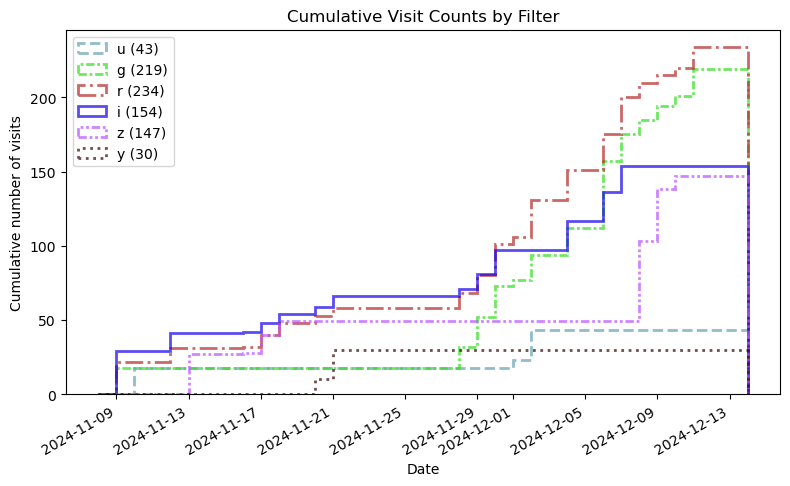

In [31]:
# Using a SKY region 'global'

degrees = radiusdeg # 0.1
butler.plot.visit_date_plot(ra_deg_Sp, dec_deg_Sp, degrees=degrees, bands='ugrizy',
                        calendar_dates=True, save=True)

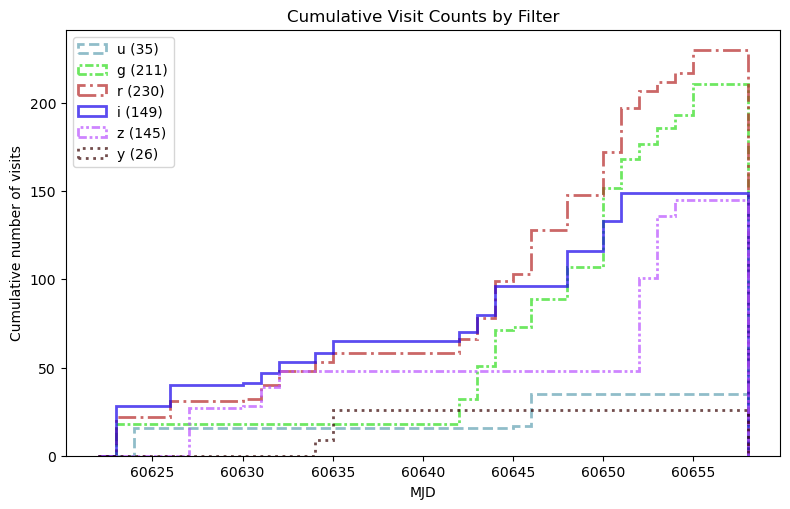

In [32]:
# Using 'deepCoadd' (by tract & patch) visit selection.
butler.plot.visit_date_plot(ra_deg, dec_deg, degrees=degrees, bands='ugrizy',
                        calendar_dates=False, save=False, mode='deepCoadd')

> Making some histograms using 'deepCoadd' of the selection of visit-tables by filter

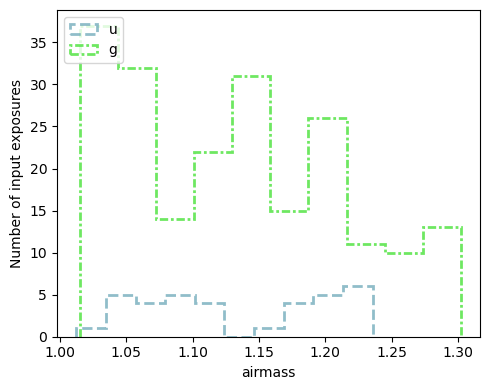

In [33]:
selection = ['airmass']

butler.plot.hist_visit_table(ra_deg, dec_deg, save=False, selection=selection, bands='ug', n_visits=None)

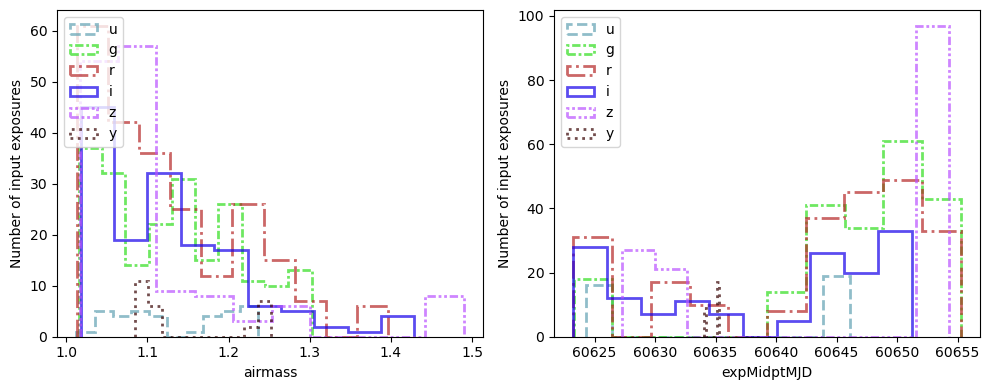

In [34]:
selection = ['airmass', 'expMidptMJD']

butler.plot.hist_visit_table(ra_deg, dec_deg, save=False, selection=selection, bands='ugrizy', n_visits=None)